<a href="https://colab.research.google.com/github/kaziandelib/Cancer_Analysis-Using-Classification_Models/blob/main/Cancer_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing Libraries** 

In [57]:
import numpy as np # Linear Algebra
import pandas as pd #Data Processing, CSV file I/O
import matplotlib.pyplot as plt #Data visualization
import seaborn as sns
%matplotlib inline

#**Loading The Dataset**

In [58]:
file = r'/content/Cancer_Data.csv' 
df = pd.read_csv(file)


In [59]:
print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [60]:
# Dropping the unnecessary data
df.drop(['id', 'Unnamed: 32'], axis = 1, inplace = True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#**Dataset Descriptions**

In [61]:
print(df.describe())

       radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

In [62]:
#To check the column labels
print(df.columns)

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [63]:
#To check the dimensions of the dataset
df.shape

(569, 31)

In [66]:
#To check for missing values
df.isnull().sum() 

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

#**Labelling Benign (B) as 0 and Malignant (M) as 1**

In [69]:
df['diagnosis'] = df['diagnosis'].map({'B' : 0, 'M' : 1})

In [70]:
# To check cases of benign and malignant cancers
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

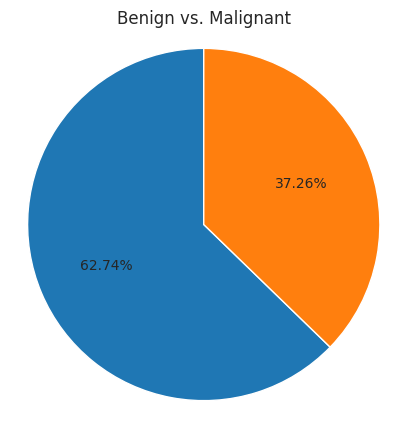

In [71]:
plt.figure(figsize=(5,5))
sns.set_style("whitegrid")
plt.pie(df['diagnosis'].value_counts(),autopct='%1.2f%%', startangle=90)
plt.axis('equal')
plt.title("Benign vs. Malignant")
plt.show()

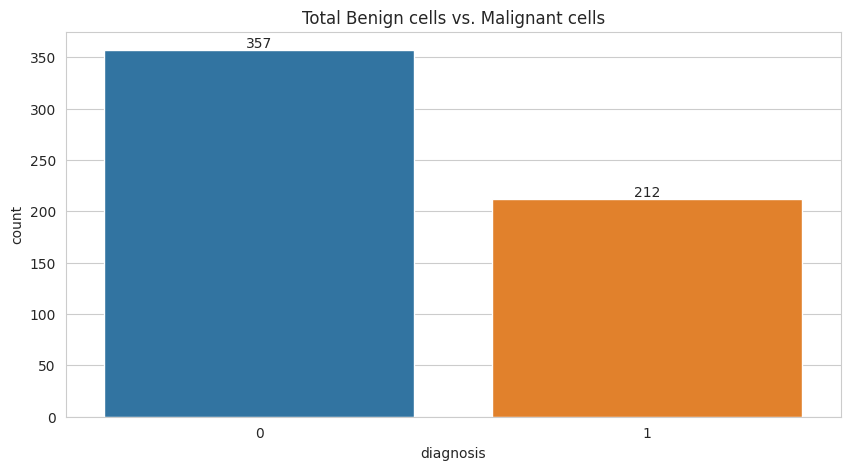

In [72]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data=df, x='diagnosis')
plt.title('Total Benign cells vs. Malignant cells')
#plt.ylim([0,3000])
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

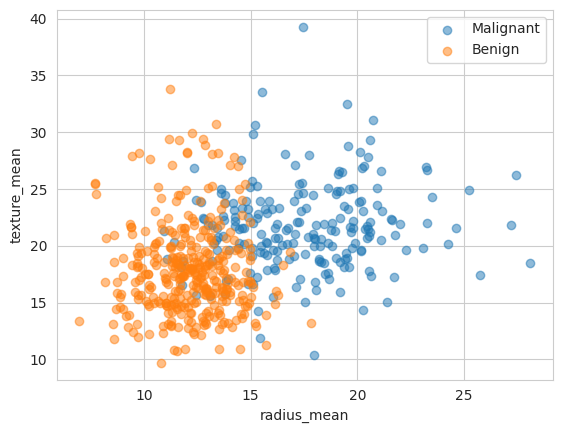

In [73]:
M = df[df.diagnosis == 1] #Diagnosis transfers all values of M to M data
B = df[df.diagnosis == 0] #Diagnosis transfers all values of B to B data

plt.scatter(M.radius_mean,M.texture_mean, label = "Malignant", alpha = 0.5)
plt.scatter(B.radius_mean,B.texture_mean,label = "Benign", alpha = 0.5)

plt.xlabel("radius_mean")
plt.ylabel("texture_mean")

plt.legend()
plt.show()


In [74]:
df.groupby('diagnosis')[['radius_mean','texture_mean']].mean()

,radius_mean,texture_mean
diagnosis,,
0,12.146524,17.914762
1,17.462830,21.604906


In [75]:
df.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


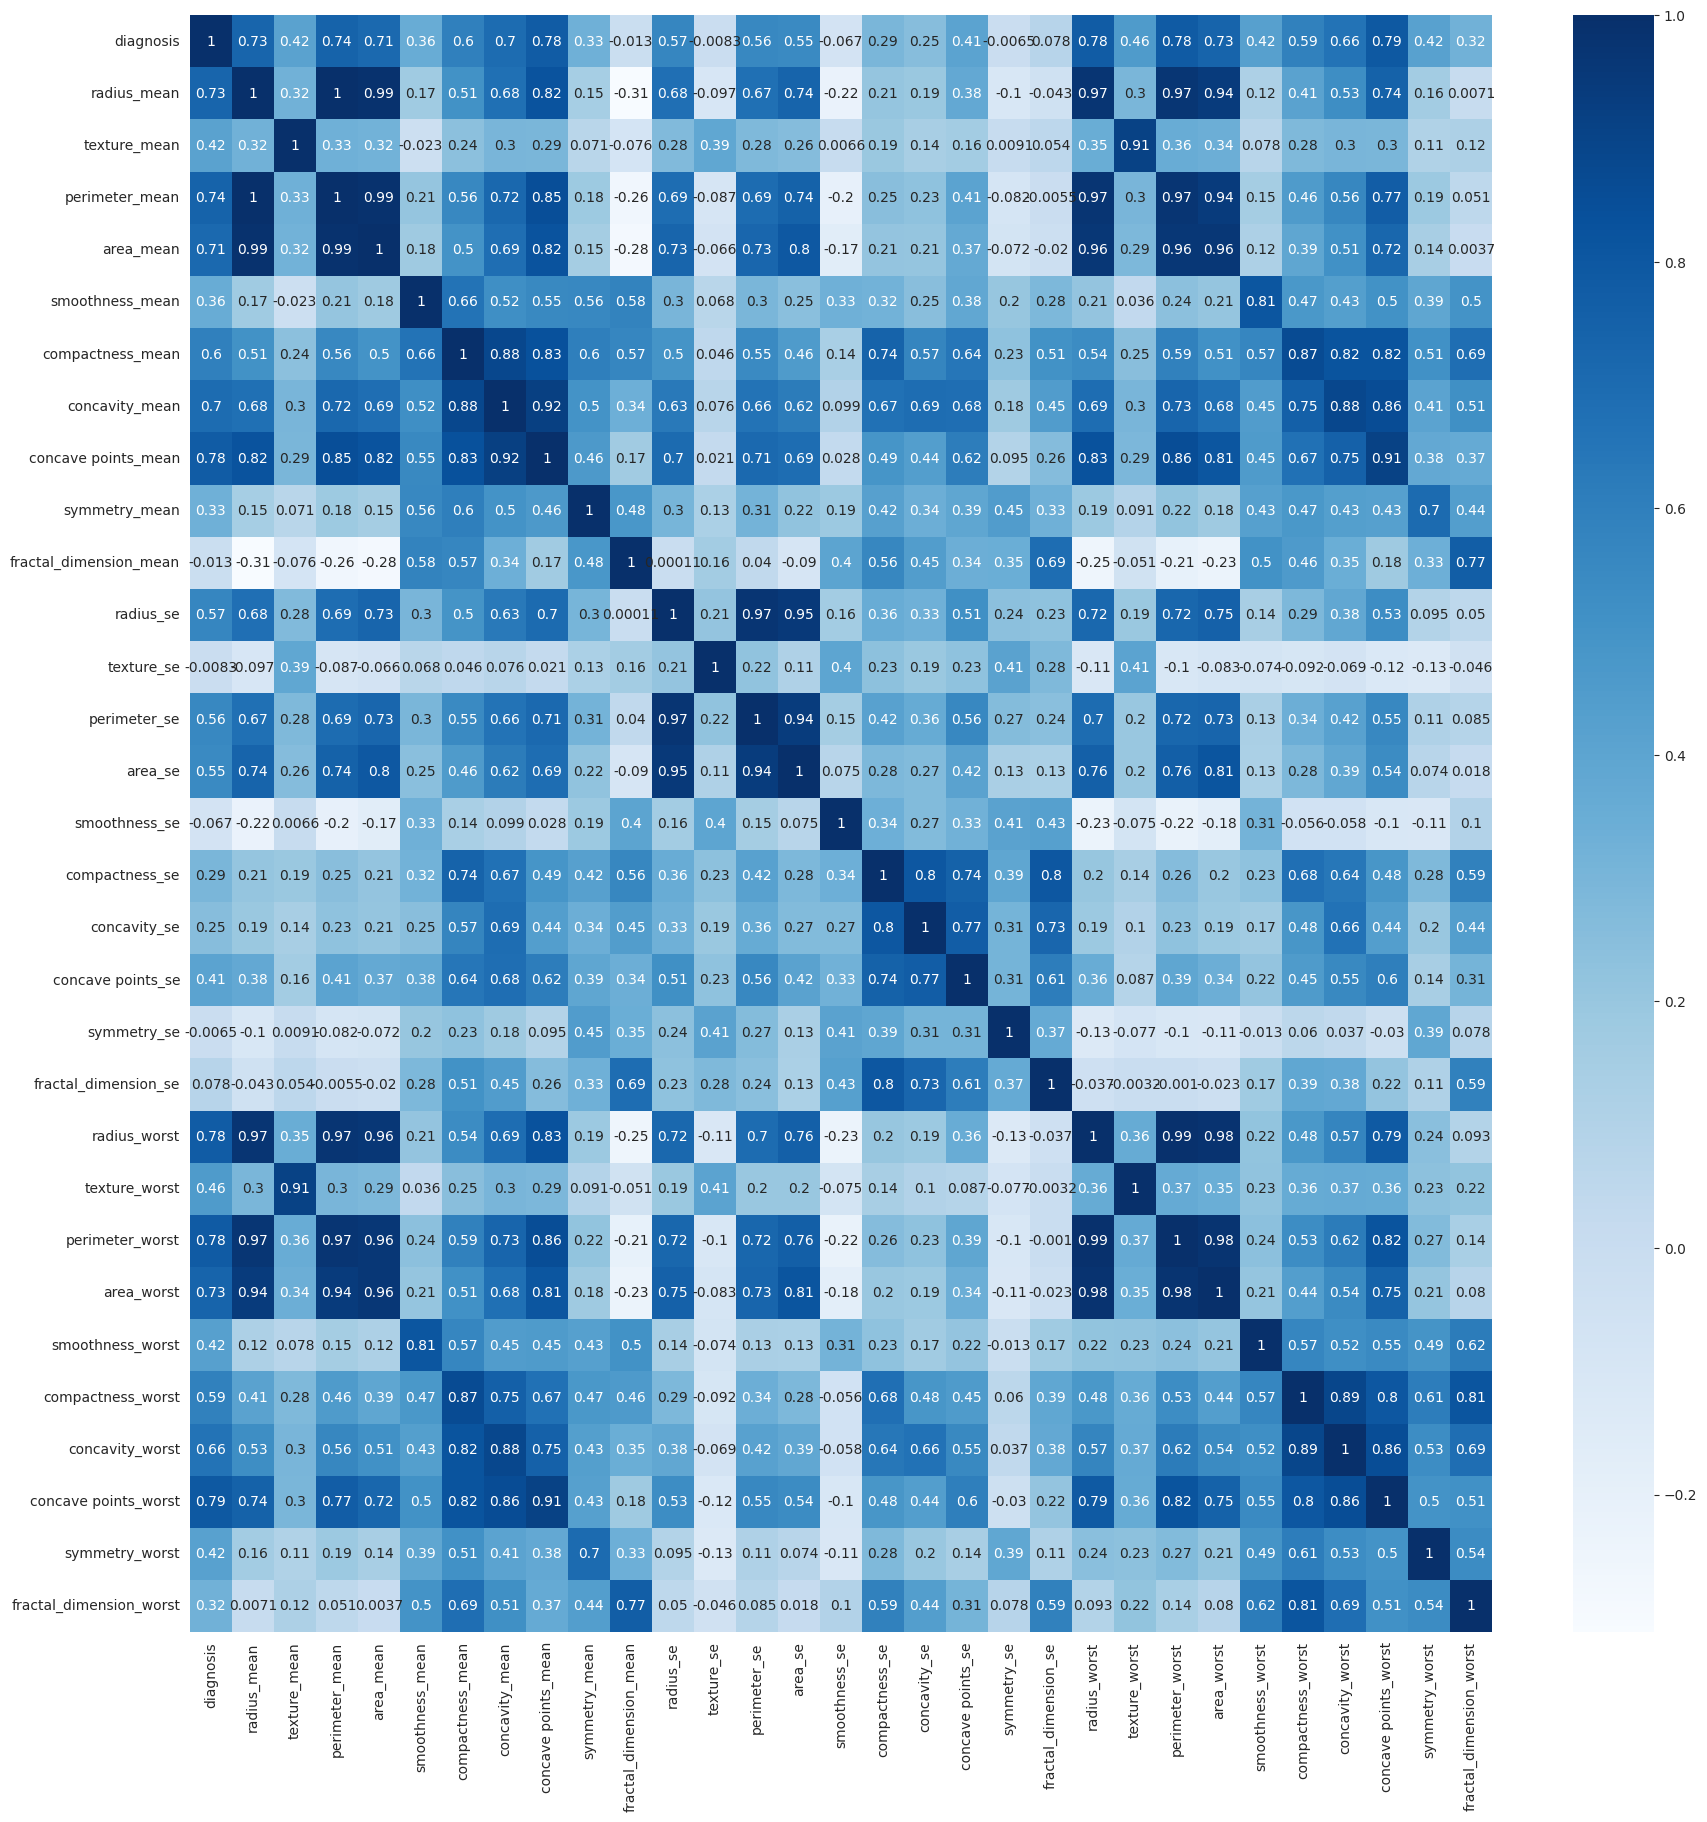

In [76]:
plt.figure(figsize=(21,21))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap="Blues")
plt.show()

#**Train Test Split**

In [77]:
#Target Column = 'Diagnosis'
y = df["diagnosis"]

X = df.drop(['diagnosis'], axis=1)

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [79]:
X_train.shape, X_test.shape

((398, 30), (171, 30))

# **Gaussian Naive Bayes Classifier**

**Train a Gaussian Naive Bayes classifier on the training Set**

In [80]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()


**Fitting the model with the training data**

In [81]:
gnb.fit(X_train, y_train)

GaussianNB()

**Making Predictions**

In [82]:
y_pred_gnb = gnb.predict(X_test)

y_pred_gnb

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1])

**Measuring the classification record**

In [83]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_gnb))


              precision    recall  f1-score   support

           0       0.95      0.96      0.95       108
           1       0.93      0.90      0.92        63

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



**Confusion Matrix Result**

In [84]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_gnb)

print("The Confusin Matrix :\n",cm)

print("True Positives(TP) : ",cm[0,0])

print("True Negatives(TN) : ",cm[1,1])

print("False Positives(FP) : ",cm[0,1])

print("False Negatives(FN) : ",cm[1,0])


The Confusin Matrix :
 [[104   4]
 [  6  57]]
True Positives(TP) :  104
True Negatives(TN) :  57
False Positives(FP) :  4
False Negatives(FN) :  6


<Axes: >

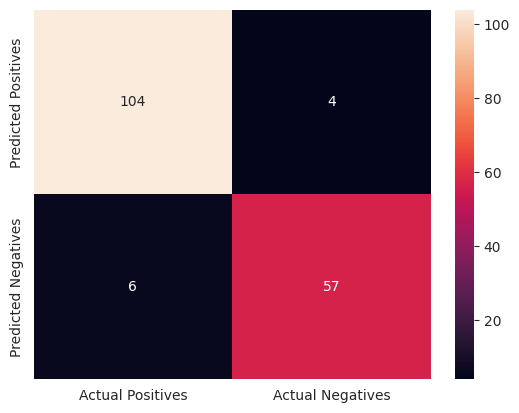

In [85]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positives', 'Actual Negatives'],
                         index = ['Predicted Positives', 'Predicted Negatives'])

sns.heatmap(cm_matrix, annot=True, fmt='d')

# **Decision Tree Classifier**

**Applying Decision Tree for the dataset**

In [86]:
from sklearn.tree import DecisionTreeClassifier

clf_gini = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)

**Fit the model with the training data**

In [87]:
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [88]:
y_pred_dec = clf_gini.predict(X_test)

y_pred_dec

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [89]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_dec))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       108
           1       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [90]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_dec)

print("The Confusin Matrix :\n",cm)

print("True Positives(TP) : ",cm[0,0])

print("True Negatives(TN) : ",cm[1,1])

print("False Positives(FP) : ",cm[0,1])

print("False Negatives(FN) : ",cm[1,0])

The Confusin Matrix :
 [[106   2]
 [  4  59]]
True Positives(TP) :  106
True Negatives(TN) :  59
False Positives(FP) :  2
False Negatives(FN) :  4


<Axes: >

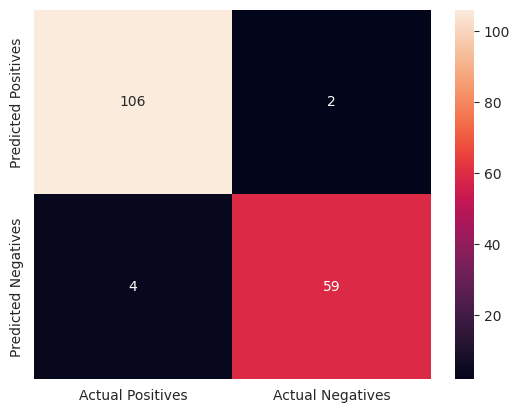

In [91]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positives', 'Actual Negatives'],
                         index = ['Predicted Positives', 'Predicted Negatives'])

sns.heatmap(cm_matrix, annot=True, fmt='d')

# **Logistic Regression** 

**Appyling Logistic Regression On The Dataset**

In [92]:
from sklearn.linear_model import LogisticRegression
clf_log = LogisticRegression(solver='liblinear', random_state=42)

**Fitting the model with Training Data**

In [93]:
clf_log.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

**Making Predictions**

In [94]:
y_pred_log = clf_log.predict(X_test)

y_pred_log

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

**Evaluating the logistic regression model and visualizing the results**

In [95]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       108
           1       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [96]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_log)

print("The Confusin Matrix :\n",cm)

print("True Positives(TP) : ",cm[0,0])

print("True Negatives(TN) : ",cm[1,1])

print("False Positives(FP) : ",cm[0,1])

print("False Negatives(FN) : ",cm[1,0])


The Confusin Matrix :
 [[106   2]
 [  4  59]]
True Positives(TP) :  106
True Negatives(TN) :  59
False Positives(FP) :  2
False Negatives(FN) :  4


<Axes: >

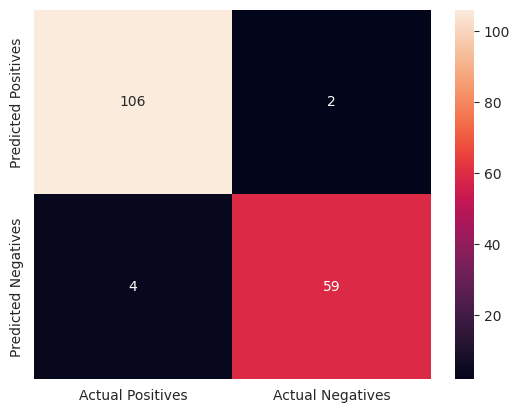

In [97]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positives', 'Actual Negatives'],
                         index = ['Predicted Positives', 'Predicted Negatives'])

sns.heatmap(cm_matrix, annot=True, fmt='d')

# **Support Vector Machine**

**Applying SVM for the Dataset**

In [98]:
from sklearn.svm import SVC 

clf_scv = SVC(kernel='linear',random_state=42) 

**Fitting the SVM model with Training Data**

In [99]:
clf_scv.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

**Making Predictions**

In [100]:
y_pred_svm = clf_scv.predict(X_test)

y_pred_svm

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

**Evaluating the Support Vector Machine model and visualizing the results**

In [101]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       108
           1       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [102]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_svm)

print("The Confusin Matrix :\n",cm)

print("True Positives(TP) : ",cm[0,0])

print("True Negatives(TN) : ",cm[1,1])

print("False Positives(FP) : ",cm[0,1])

print("False Negatives(FN) : ",cm[1,0])


The Confusin Matrix :
 [[106   2]
 [  4  59]]
True Positives(TP) :  106
True Negatives(TN) :  59
False Positives(FP) :  2
False Negatives(FN) :  4


<Axes: >

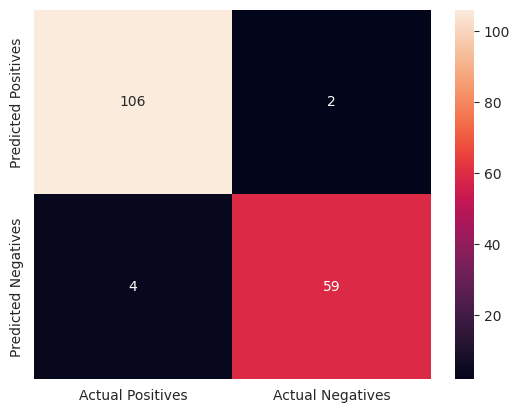

In [103]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positives', 'Actual Negatives'],
                         index = ['Predicted Positives', 'Predicted Negatives'])

sns.heatmap(cm_matrix, annot=True, fmt='d')

# **K Nearest Neighbor Classifier**

**Applying KNN for the Dataset**

In [104]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2) 

**Fitting the KNN model with Training Data**

In [105]:
clf_knn.fit(X_train, y_train)

KNeighborsClassifier()

**Making Predictions**

In [106]:
y_pred_knn = clf_knn.predict(X_test)

y_pred_knn

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

**Evaluating the Support Vector Machine model and visualizing the results**

In [107]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       108
           1       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [108]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_knn)

print("The Confusin Matrix :\n",cm)

print("True Positives(TP) : ",cm[0,0])

print("True Negatives(TN) : ",cm[1,1])

print("False Positives(FP) : ",cm[0,1])

print("False Negatives(FN) : ",cm[1,0])

The Confusin Matrix :
 [[107   1]
 [  6  57]]
True Positives(TP) :  107
True Negatives(TN) :  57
False Positives(FP) :  1
False Negatives(FN) :  6


<Axes: >

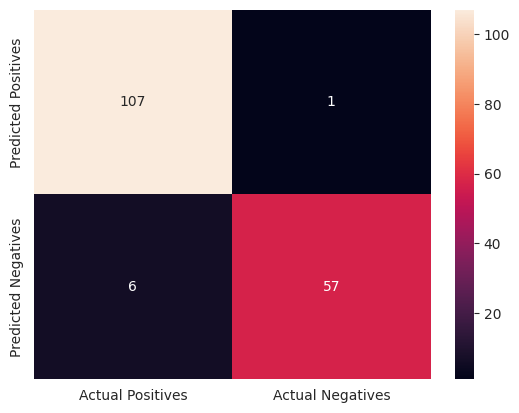

In [109]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positives', 'Actual Negatives'],
                         index = ['Predicted Positives', 'Predicted Negatives'])

sns.heatmap(cm_matrix, annot=True, fmt='d')